In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import cmocean.cm as cm
import copy
from salishsea_tools import viz_tools
import numpy as np
from matplotlib import colors
import glob 
from mocsy import mocsy
import gsw
import netCDF4 as nc

In [2]:
ii, ij = 250, 350
ji, jj = 150, 300

In [3]:
# mesh mask file for land mask
meshmask = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')
tmask = meshmask.tmask[0]
tmask = tmask.rename({'z' : 'depth'})
tmask = tmask.rename({'y' : 'gridY'})
tmask = tmask.rename({'x' : 'gridX'})
area = meshmask.e1t[0] * meshmask.e2t[0]
area = area.rename({'y' : 'gridY'})
area = area.rename({'x' : 'gridX'})

In [4]:
data_x304_y446 = '/ocean/jtao/MOAD/extractions/SalishSeaCast_wastewater_month_TA_and_DIC_x304_y446_20180101_20181231.nc'
data_x305_y446 = '/ocean/jtao/MOAD/extractions/SalishSeaCast_wastewater_month_TA_and_DIC_x305_y446_20180101_20181231.nc'
data_x304_y447 = '/ocean/jtao/MOAD/extractions/SalishSeaCast_wastewater_month_TA_and_DIC_x304_y447_20180101_20181231.nc'
data_x305_y447 = '/ocean/jtao/MOAD/extractions/SalishSeaCast_wastewater_month_TA_and_DIC_x305_y447_20180101_20181231.nc'

new_data_x304_y446 = '/ocean/jtao/MOAD/extractions/SalishSeaCast_wastewater_month_new_DIC_TA_x304_y446_20180101_20181231.nc'
new_data_x305_y446 = '/ocean/jtao/MOAD/extractions/SalishSeaCast_wastewater_month_new_DIC_TA_x305_y446_20180101_20181231.nc'
new_data_x304_y447 = '/ocean/jtao/MOAD/extractions/SalishSeaCast_wastewater_month_new_DIC_TA_x304_y447_20180101_20181231.nc'
new_data_x305_y447 = '/ocean/jtao/MOAD/extractions/SalishSeaCast_wastewater_month_new_DIC_TA_x305_y447_20180101_20181231.nc'

x304_y446 = glob.glob(data_x304_y446)
x305_y446 = glob.glob(data_x305_y446)
x304_y447 = glob.glob(data_x304_y447)
x305_y447 = glob.glob(data_x305_y447)

new_x304_y446 = glob.glob(new_data_x304_y446)
new_x305_y446 = glob.glob(new_data_x305_y446)
new_x304_y447 = glob.glob(new_data_x304_y447)
new_x305_y447 = glob.glob(new_data_x305_y447)

dic_x304_y446 = xr.open_mfdataset(x304_y446, data_vars=['dissolved_inorganic_carbon']) 
ta_x304_y446 = xr.open_mfdataset(x304_y446, data_vars=['total_alkalinity']) 

dic_x305_y446 = xr.open_mfdataset(x305_y446, data_vars=['dissolved_inorganic_carbon']) 
ta_x305_y446 = xr.open_mfdataset(x305_y446, data_vars=['total_alkalinity']) 

dic_x304_y447 = xr.open_mfdataset(x304_y447, data_vars=['dissolved_inorganic_carbon']) 
ta_x304_y447 = xr.open_mfdataset(x304_y447, data_vars=['total_alkalinity']) 

dic_x305_y447 = xr.open_mfdataset(x305_y447, data_vars=['dissolved_inorganic_carbon']) 
ta_x305_y447 = xr.open_mfdataset(x305_y447, data_vars=['total_alkalinity']) 



new_dic_x304_y446 = xr.open_mfdataset(new_x304_y446, data_vars=['dissolved_inorganic_carbon']) 
new_ta_x304_y446 = xr.open_mfdataset(new_x304_y446, data_vars=['total_alkalinity']) 

new_dic_x305_y446 = xr.open_mfdataset(new_x305_y446, data_vars=['dissolved_inorganic_carbon']) 
new_ta_x305_y446 = xr.open_mfdataset(new_x305_y446, data_vars=['total_alkalinity']) 

new_dic_x304_y447 = xr.open_mfdataset(new_x304_y447, data_vars=['dissolved_inorganic_carbon']) 
new_ta_x304_y447 = xr.open_mfdataset(new_x304_y447, data_vars=['total_alkalinity']) 

new_dic_x305_y447 = xr.open_mfdataset(new_x305_y447, data_vars=['dissolved_inorganic_carbon']) 
new_ta_x305_y447 = xr.open_mfdataset(new_x305_y447, data_vars=['total_alkalinity']) 



In [5]:
x304_y446_dic = dic_x304_y446['dissolved_inorganic_carbon']
x304_y446_ta = ta_x304_y446['total_alkalinity']

x305_y446_dic = dic_x305_y446['dissolved_inorganic_carbon']
x305_y446_ta = ta_x305_y446['total_alkalinity']

x304_y447_dic = dic_x304_y447['dissolved_inorganic_carbon'] 
x304_y447_ta = ta_x304_y447['total_alkalinity']

x305_y447_dic = dic_x305_y447['dissolved_inorganic_carbon'] 
x305_y447_ta = ta_x305_y447['total_alkalinity']

new_x304_y446_dic = new_dic_x304_y446['dissolved_inorganic_carbon']
new_x304_y446_ta = new_ta_x304_y446['total_alkalinity'] 

new_x305_y446_dic = new_dic_x305_y446['dissolved_inorganic_carbon'] 
new_x305_y446_ta = new_ta_x305_y446['total_alkalinity'] 
new_x304_y447_dic = new_dic_x304_y447['dissolved_inorganic_carbon'] 
new_x304_y447_ta = new_ta_x304_y447['total_alkalinity'] 

new_x305_y447_dic = new_dic_x305_y447['dissolved_inorganic_carbon'] 
new_x305_y447_ta = new_ta_x305_y447['total_alkalinity'] 




In [6]:
data_TA_DIC_x304_y446 = '/ocean/jtao/MOAD/extractions/SalishSeaCast_wastewater_month_TA_and_DIC_x304_y446_20180101_20181231.nc'
data_Temp_Salinity_x304_y446 = '/ocean/jtao/MOAD/extractions/SalishSeaCast_wastewater_month_temp_and_salinity_x304_y446_20180101_20181231.nc'

TA_DIC_x304_y446 = glob.glob(data_TA_DIC_x304_y446)
Temp_sali_x304_y446 = glob.glob(data_Temp_Salinity_x304_y446)

dic_x304_y446 = xr.open_mfdataset(TA_DIC_x304_y446, data_vars=['dissolved_inorganic_carbon']) 
ta_x304_y446 = xr.open_mfdataset(TA_DIC_x304_y446, data_vars=['total_alkalinity']) 
temp_x304_y446 = xr.open_mfdataset(Temp_sali_x304_y446, data_vars=['votemper']) 
salinity_x304_y446 = xr.open_mfdataset(Temp_sali_x304_y446, data_vars=['vosaline']) 

In [7]:
data_TA_DIC_x305_y446 = '/ocean/jtao/MOAD/extractions/SalishSeaCast_wastewater_month_TA_and_DIC_x305_y446_20180101_20181231.nc'
data_Temp_Salinity_x305_y446 = '/ocean/jtao/MOAD/extractions/SalishSeaCast_wastewater_month_temp_and_salinity_x305_y446_20180101_20181231.nc'

TA_DIC_x305_y446 = glob.glob(data_TA_DIC_x305_y446)
Temp_sali_x305_y446 = glob.glob(data_Temp_Salinity_x305_y446)

dic_x305_y446 = xr.open_mfdataset(TA_DIC_x305_y446, data_vars=['dissolved_inorganic_carbon']) 
ta_x305_y446 = xr.open_mfdataset(TA_DIC_x305_y446, data_vars=['total_alkalinity']) 
temp_x305_y446 = xr.open_mfdataset(Temp_sali_x305_y446, data_vars=['votemper']) 
salinity_x305_y446 = xr.open_mfdataset(Temp_sali_x305_y446, data_vars=['vosaline'])

In [15]:
data_TA_DIC_x304_y447 = '/ocean/jtao/MOAD/extractions/SalishSeaCast_wastewater_month_TA_and_DIC_x304_y447_20180101_20181231.nc'
data_Temp_Salinity_x304_y447 = '/ocean/jtao/MOAD/extractions/SalishSeaCast_wastewater_month_temp_and_salinity_x304_y447_20180101_20181231.nc'

TA_DIC_x304_y447 = glob.glob(data_TA_DIC_x304_y447)
Temp_sali_x304_y447 = glob.glob(data_Temp_Salinity_x304_y447)

dic_x304_y447 = xr.open_mfdataset(TA_DIC_x304_y447, data_vars=['dissolved_inorganic_carbon']) 
ta_x304_y447 = xr.open_mfdataset(TA_DIC_x304_y447, data_vars=['total_alkalinity']) 
temp_x304_y447 = xr.open_mfdataset(Temp_sali_x304_y447, data_vars=['votemper']) 
salinity_x304_y447 = xr.open_mfdataset(Temp_sali_x304_y447, data_vars=['vosaline']) 

In [8]:
data_TA_DIC_x305_y447 = '/ocean/jtao/MOAD/extractions/SalishSeaCast_wastewater_month_TA_and_DIC_x305_y447_20180101_20181231.nc'
data_Temp_Salinity_x305_y447 = '/ocean/jtao/MOAD/extractions/SalishSeaCast_wastewater_month_temp_and_salinity_x305_y447_20180101_20181231.nc'

TA_DIC_x305_y447 = glob.glob(data_TA_DIC_x305_y447)
Temp_sali_x305_y447 = glob.glob(data_Temp_Salinity_x305_y447)

dic_x305_y447 = xr.open_mfdataset(TA_DIC_x305_y447, data_vars=['dissolved_inorganic_carbon']) 
ta_x305_y447 = xr.open_mfdataset(TA_DIC_x305_y447, data_vars=['total_alkalinity']) 
temp_x305_y447 = xr.open_mfdataset(Temp_sali_x305_y447, data_vars=['votemper']) 
salinity_x305_y447 = xr.open_mfdataset(Temp_sali_x305_y447, data_vars=['vosaline']) 

In [9]:
new_data_TA_DIC_x304_y446 = '/ocean/jtao/MOAD/extractions/SalishSeaCast_wastewater_month_new_DIC_TA_x304_y446_20180101_20181231.nc'
new_data_Temp_Salinity_x304_y446 = '/ocean/jtao/MOAD/extractions/SalishSeaCast_wastewater_month_new_temp_salinity_x304_y446_20180101_20181231.nc'

new_TA_DIC_x304_y446 = glob.glob(new_data_TA_DIC_x304_y446)
new_Temp_sali_x304_y446 = glob.glob(new_data_Temp_Salinity_x304_y446)

new_dic_x304_y446 = xr.open_mfdataset(new_TA_DIC_x304_y446, data_vars=['dissolved_inorganic_carbon']) 
new_ta_x304_y446 = xr.open_mfdataset(new_TA_DIC_x304_y446, data_vars=['total_alkalinity']) 
new_temp_x304_y446 = xr.open_mfdataset(new_Temp_sali_x304_y446, data_vars=['votemper']) 
new_salinity_x304_y446 = xr.open_mfdataset(new_Temp_sali_x304_y446, data_vars=['vosaline']) 

In [10]:
new_data_TA_DIC_x305_y446 = '/ocean/jtao/MOAD/extractions/SalishSeaCast_wastewater_month_new_DIC_TA_x305_y446_20180101_20181231.nc'
new_data_Temp_Salinity_x305_y446 = '/ocean/jtao/MOAD/extractions/SalishSeaCast_wastewater_month_new_temp_salinity_x305_y446_20180101_20181231.nc'

new_TA_DIC_x305_y446 = glob.glob(new_data_TA_DIC_x305_y446)
new_Temp_sali_x305_y446 = glob.glob(new_data_Temp_Salinity_x305_y446)

new_dic_x305_y446 = xr.open_mfdataset(new_TA_DIC_x305_y446, data_vars=['dissolved_inorganic_carbon']) 
new_ta_x305_y446 = xr.open_mfdataset(new_TA_DIC_x305_y446, data_vars=['total_alkalinity']) 
new_temp_x305_y446 = xr.open_mfdataset(new_Temp_sali_x305_y446, data_vars=['votemper']) 
new_salinity_x305_y446 = xr.open_mfdataset(new_Temp_sali_x305_y446, data_vars=['vosaline']) 

In [11]:
new_data_TA_DIC_x304_y447 = '/ocean/jtao/MOAD/extractions/SalishSeaCast_wastewater_month_new_DIC_TA_x304_y447_20180101_20181231.nc'
new_data_Temp_Salinity_x304_y447 = '/ocean/jtao/MOAD/extractions/SalishSeaCast_wastewater_month_new_temp_salinity_x304_y447_20180101_20181231.nc'

new_TA_DIC_x304_y447 = glob.glob(new_data_TA_DIC_x304_y447)
new_Temp_sali_x304_y447 = glob.glob(new_data_Temp_Salinity_x304_y447)

new_dic_x304_y447 = xr.open_mfdataset(new_TA_DIC_x304_y447, data_vars=['dissolved_inorganic_carbon']) 
new_ta_x304_y447 = xr.open_mfdataset(new_TA_DIC_x304_y447, data_vars=['total_alkalinity']) 
new_temp_x304_y447 = xr.open_mfdataset(new_Temp_sali_x304_y447, data_vars=['votemper']) 
new_salinity_x304_y447 = xr.open_mfdataset(new_Temp_sali_x304_y447, data_vars=['vosaline'])

In [12]:
new_data_TA_DIC_x305_y447 = '/ocean/jtao/MOAD/extractions/SalishSeaCast_wastewater_month_new_DIC_TA_x305_y447_20180101_20181231.nc'
new_data_Temp_Salinity_x305_y447 = '/ocean/jtao/MOAD/extractions/SalishSeaCast_wastewater_month_new_temp_salinity_x305_y447_20180101_20181231.nc'

new_TA_DIC_x305_y447 = glob.glob(new_data_TA_DIC_x305_y447)
new_Temp_sali_x305_y447 = glob.glob(new_data_Temp_Salinity_x305_y447)

new_dic_x305_y447 = xr.open_mfdataset(new_TA_DIC_x305_y447, data_vars=['dissolved_inorganic_carbon']) 
new_ta_x305_y447 = xr.open_mfdataset(new_TA_DIC_x305_y447, data_vars=['total_alkalinity']) 
new_temp_x305_y447 = xr.open_mfdataset(new_Temp_sali_x305_y447, data_vars=['votemper']) 
new_salinity_x305_y447 = xr.open_mfdataset(new_Temp_sali_x305_y447, data_vars=['vosaline'])

In [13]:
def getPH (sali, temp, ta, dic):
    Tinsitu = np.array(gsw.t_from_CT(sali.vosaline[:, 0, 0, 0], temp.votemper[:, 0,  0, 0], 0))
    Spsu = 35/35.16504 * np.array(sali.vosaline[:, 0,  0, 0])
    TA = np.array(ta.total_alkalinity[:, 0,  0, 0])/1000.
    DIC = np.array(dic.dissolved_inorganic_carbon[:, 0,  0, 0])/1000.
    ones = np.ones_like(Spsu.flatten())
    response_tup = mocsy.mvars(temp=Tinsitu.flatten(), sal=Spsu.flatten(), alk=TA.flatten(), 
                               dic=DIC.flatten(), sil=0.*ones, phos=0.*ones, patm=0.*ones, 
                               depth=0.*ones, lat=0.*ones, optcon='mol/m3', optt='Tinsitu', optp='m',
                               optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')
    return response_tup

In [16]:
pH_x304_y446,pco2_x304_y446,fco2_x304_y446,co2_x304_y446,hco3_x304_y446,co3_x304_y446,OmegaA_x304_y446,OmegaC_x304_y446,BetaD_x304_y446,DENis_x304_y446,p_x304_y446,Tis_x304_y446 = getPH(salinity_x304_y446, temp_x304_y446, ta_x304_y446, dic_x304_y446)

pH_x305_y446,pco2_x305_y446,fco2_x305_y446,co2_x305_y446,hco3_x305_y446,co3_x305_y446,OmegaA_x305_y446,OmegaC_x305_y446,BetaD_x305_y446,DENis_x305_y446,p_x305_y446,Tis_x305_y446 = getPH(salinity_x305_y446, temp_x305_y446, ta_x305_y446, dic_x305_y446)

pH_x304_y447,pco2_x304_y447,fco2_x304_y447,co2_x304_y447,hco3_x304_y447,co3_x304_y447,OmegaA_x304_y447,OmegaC_x304_y447,BetaD_x304_y447,DENis_x304_y447,p_x304_y447,Tis_x304_y447 = getPH(salinity_x304_y447, temp_x304_y447, ta_x304_y447, dic_x304_y447)

pH_x305_y447,pco2_x305_y447,fco2_x305_y447,co2_x305_y447,hco3_x305_y447,co3_x305_y447,OmegaA_x305_y447,OmegaC_x305_y447,BetaD_x305_y447,DENis_x305_y447,p_x305_y447,Tis_x305_y447 = getPH(salinity_x305_y447, temp_x305_y447, ta_x305_y447, dic_x305_y447)

new_pH_x304_y446,new_pco2_x304_y446, new_fco2_x304_y446,new_co2_x304_y446,new_hco3_x304_y446,new_co3_x304_y446,new_OmegaA_x304_y446,new_OmegaC_x304_y446,new_BetaD_x304_y446,new_DENis_x304_y446,new_p_x304_y446,new_Tis_x304_y446 = getPH(new_salinity_x304_y446, new_temp_x304_y446, new_ta_x304_y446, new_dic_x304_y446)

new_pH_x305_y446,new_pco2_x305_y446,new_fco2_x305_y446,new_co2_x305_y446,new_hco3_x305_y446,new_co3_x305_y446,new_OmegaA_x305_y446,new_OmegaC_x305_y446,new_BetaD_x305_y446,new_DENis_x305_y446,new_p_x305_y446,new_Tis_x305_y446 = getPH(new_salinity_x305_y446, new_temp_x305_y446, new_ta_x305_y446, new_dic_x305_y446)

new_pH_x304_y447,new_pco2_x304_y447, new_fco2_x304_y447,new_co2_x304_y447,new_hco3_x304_y447,new_co3_x304_y447,new_OmegaA_x304_y447,new_OmegaC_x304_y447,new_BetaD_x304_y447,new_DENis_x304_y447,new_p_x304_y447,new_Tis_x304_y447 = getPH(new_salinity_x304_y447, new_temp_x304_y447, new_ta_x304_y447, new_dic_x304_y447)

new_pH_x305_y447,new_pco2_x305_y447,new_fco2_x305_y447,new_co2_x305_y447,new_hco3_x305_y447,new_co3_x305_y447,new_OmegaA_x305_y447,new_OmegaC_x305_y447,new_BetaD_x305_y447,new_DENis_x305_y447,new_p_x305_y447,new_Tis_x305_y447 = getPH(new_salinity_x305_y447, new_temp_x305_y447, new_ta_x305_y447, new_dic_x305_y447)

In [17]:
print(type(new_pH_x305_y447))

<class 'numpy.ndarray'>


In [18]:
wastewater = xr.open_dataset('/ocean/jtao/MOAD/analysis-jake/notebooks/Wastewater.nc')
wastewater = wastewater.drop('time')

months = np.arange('2018-01', '2019-01', dtype='datetime64[M]')

#pd.date_range('2018-01-01', periods=12, freq='M')
wastewater = wastewater.assign_coords(time = months)


/tmp/ipykernel_1784911/1293134792.py:7: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  wastewater = wastewater.assign_coords(time = months)


In [19]:
wastewater

<xarray.Dataset>
Dimensions:      (time: 12)
Coordinates:
  * time         (time) datetime64[ns] 2018-01-01 2018-02-01 ... 2018-12-01
Data variables: (12/14)
    temp         (time) float32 ...
    ph           (time) float32 ...
    nh3          (time) float32 ...
    bod_calc     (time) float32 ...
    cl           (time) float32 ...
    cond         (time) float32 ...
    ...           ...
    no3          (time) float32 ...
    no2          (time) float32 ...
    alkalinity   (time) float32 ...
    ss           (time) float32 ...
    vss          (time) float32 ...
    dic          (time) float32 ...
Attributes:
    acknowledgements:      Based on Metro Data File
    creator_email:         sallen@eoas.ubc.ca
    creator_name:          UBC Salish Sea Project Contributors
    creator_url:           https://salishsea-meopar-docs.readthedocs.org/
    institution:           UBC EOAS
    institution_fullname:  Earth, Ocean & Atmospheric Sciences, University of...
    title:                 wastewater_20230917
    comment:               wastewater_20230917 on Monthly Time Coordinates
    notebook:              Wastewater_File.ipynb
    summary:               Wastewater, flux, area, and conservative temperature
    history:               [2023-11-15] File creation.

In [20]:
wastewater['alkalinity'] =  (wastewater['alkalinity']) * 1000 /100.0869 

In [21]:
wastewater['alkalinity']

<xarray.DataArray 'alkalinity' (time: 12)>
array([ 862.49493,  937.112  ,  873.1104 , 1017.2796 , 1075.4159 ,
       1140.9143 , 1153.521  , 1176.9478 , 1139.4608 , 1046.6378 ,
        888.04016,  895.82153], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2018-01-01 2018-02-01 ... 2018-12-01

In [22]:
diff_DIC_TA_W = wastewater.alkalinity - wastewater.dic
print(diff_DIC_TA_W)

<xarray.DataArray (time: 12)>
array([-121.35297 , -132.87482 , -127.89374 , -140.52826 , -140.10547 ,
       -146.81934 , -147.33606 , -156.07068 , -138.14734 , -126.43945 ,
       -113.79822 , -117.424194], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2018-01-01 2018-02-01 ... 2018-12-01


In [23]:
pH = np.array(wastewater.ph)


In [24]:
print(pH)

[7.298093  7.290883  7.273684  7.280392  7.2842855 7.2760415 7.2698426
 7.2497807 7.29219   7.3108764 7.306047  7.3162465]


/tmp/ipykernel_1784911/185425406.py:88: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0, 2].set_xticklabels(time_label)
/tmp/ipykernel_1784911/185425406.py:97: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1, 2].set_xticklabels(time_label)
/tmp/ipykernel_1784911/185425406.py:106: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[2, 2].set_xticklabels(time_label)
/tmp/ipykernel_1784911/185425406.py:116: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[3, 2].set_xticklabels(time_label)


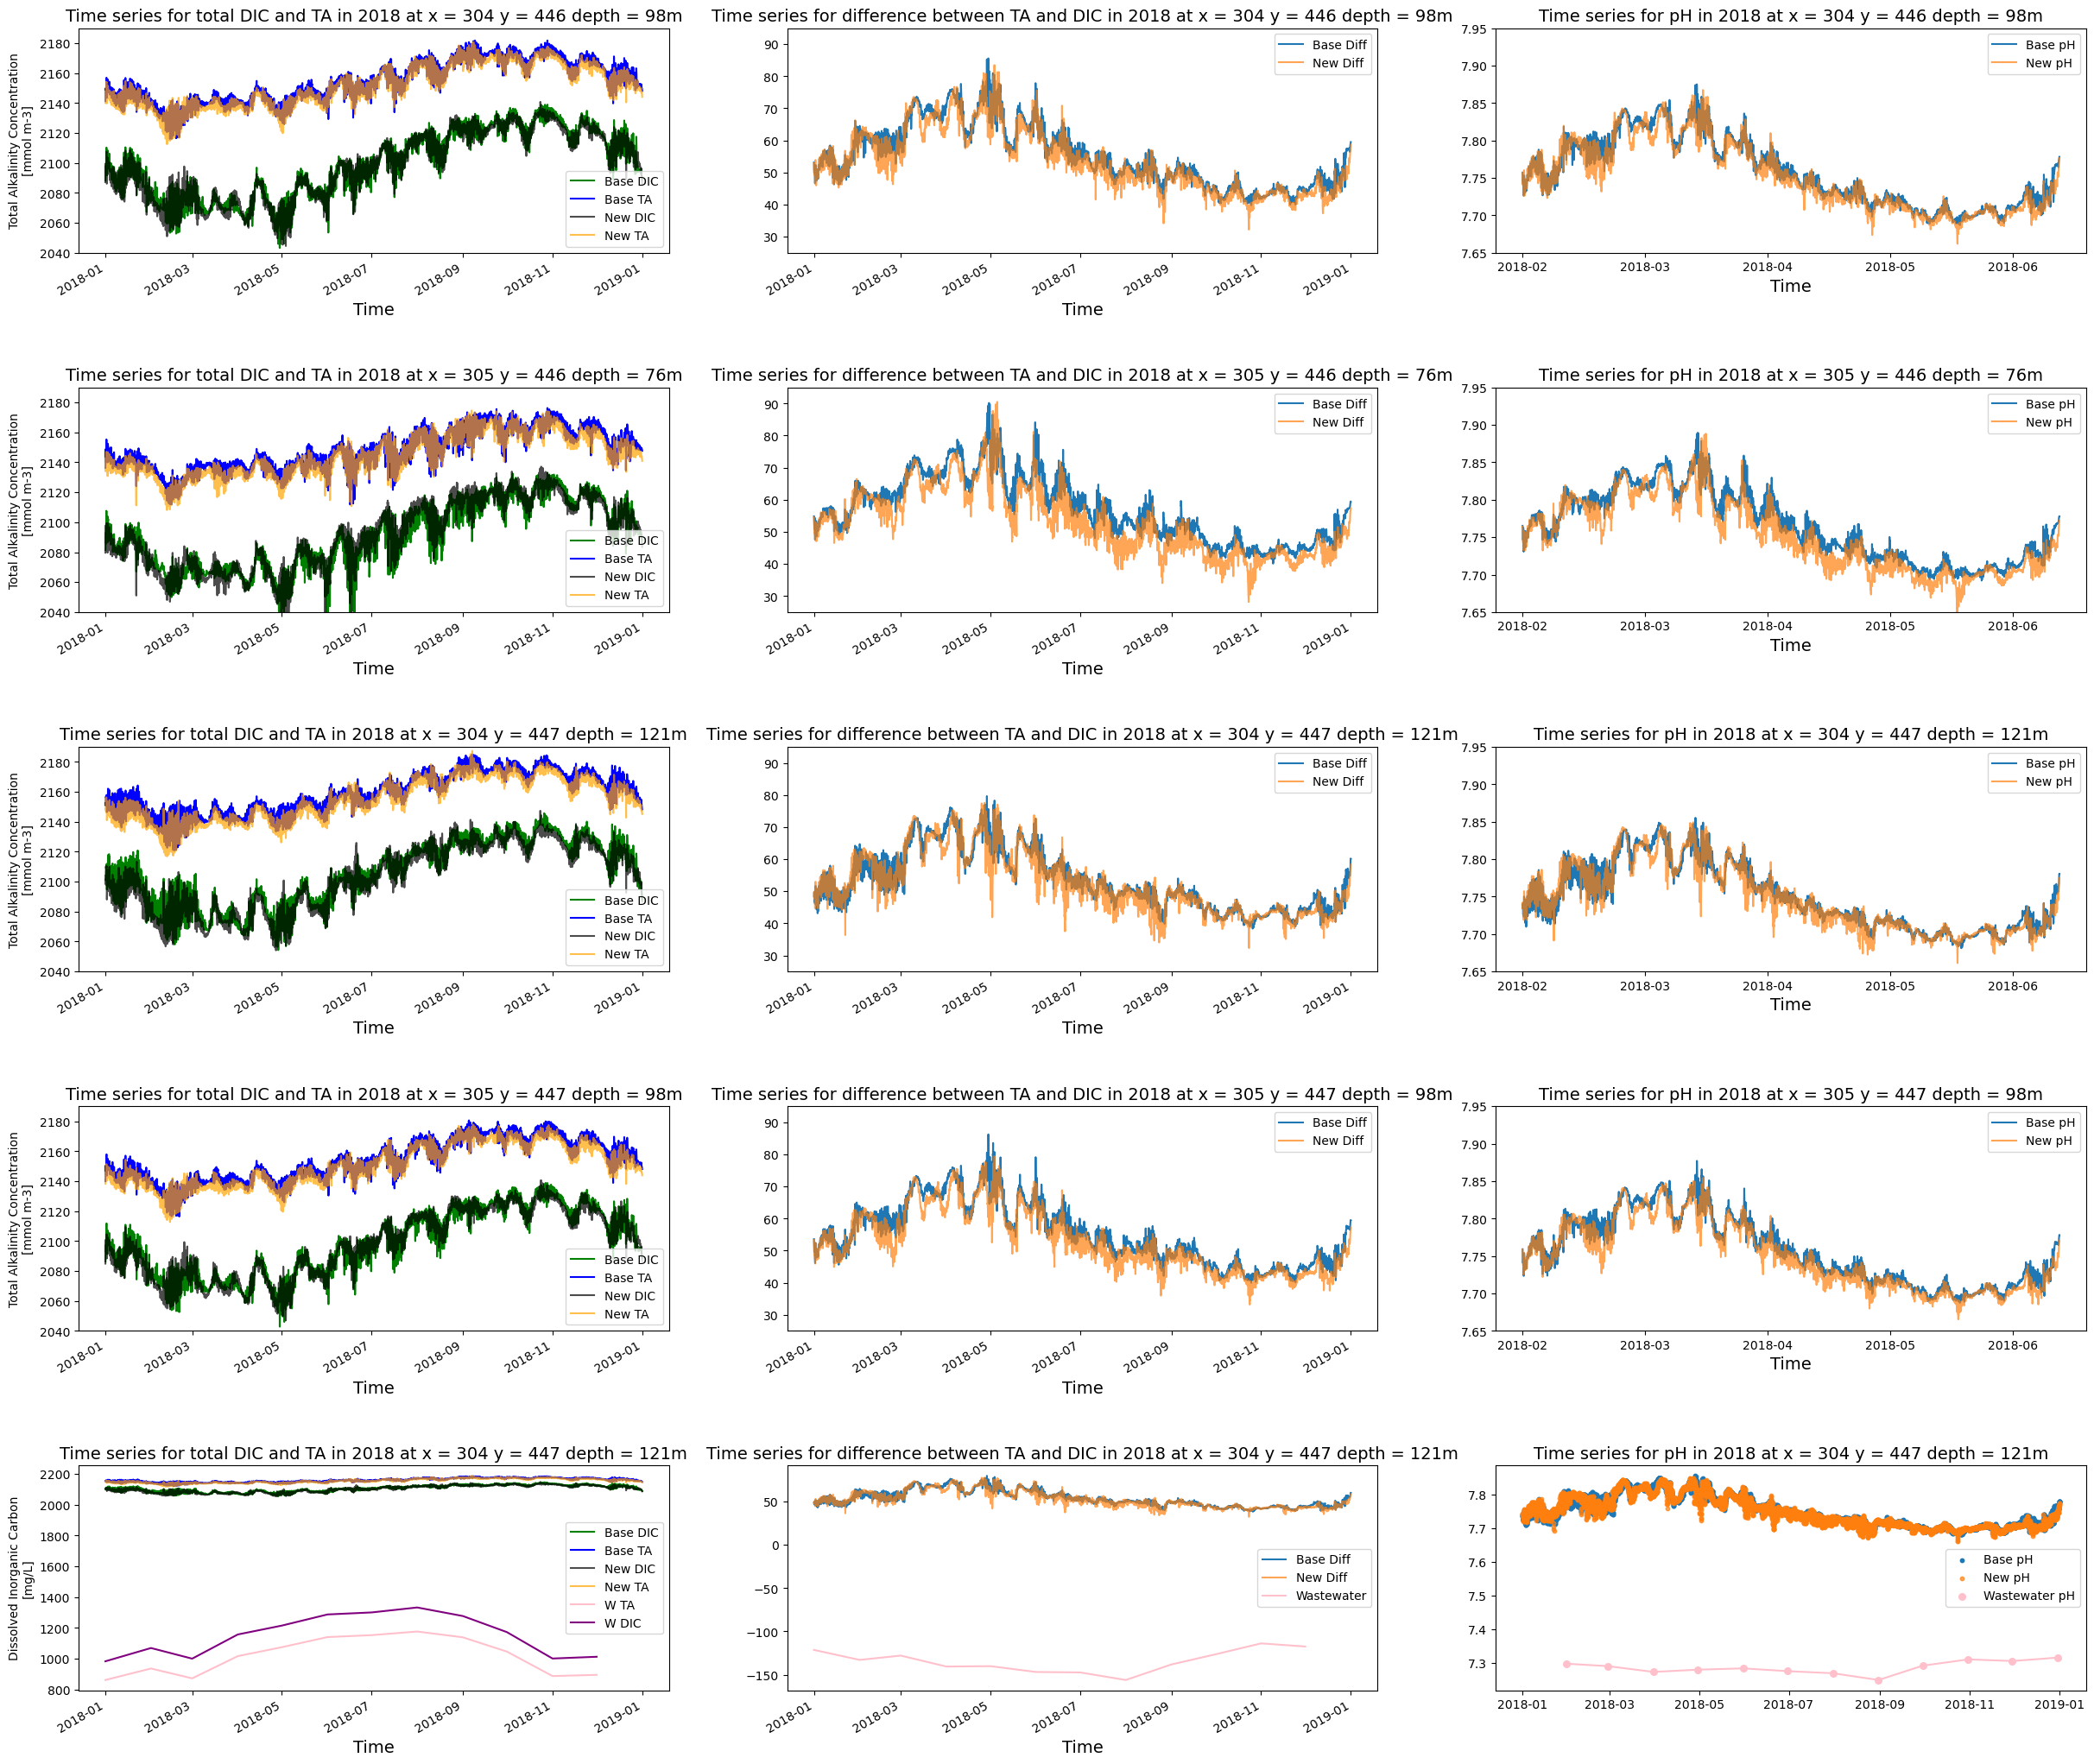

<Figure size 1000x600 with 0 Axes>

In [25]:
fig, axs = plt.subplots(5, 3, figsize=(30, 25))
plt.subplots_adjust(hspace=0.6) 
x304_y446_dic.plot(ax= axs[0,0], label = 'Base DIC', color = 'green')
x304_y446_ta.plot(ax= axs[0,0], label = "Base TA", color = 'blue')
new_x304_y446_dic.plot(ax= axs[0,0], label = 'New DIC', color = 'black', alpha = 0.7)
new_x304_y446_ta.plot(ax= axs[0,0], label = "New TA", color = 'orange', alpha = 0.7)
#axs[0,0].set_xlim([pd.Timestamp('2018-01-01'), pd.Timestamp('2018-12-31')])
axs[0,0].legend()
axs[0,0].set_title('Time series for total DIC and TA in 2018 at x = 304 y = 446 depth = 98m', fontsize = 14)
axs[0,0].set_xlabel('Time', fontsize = 14)
axs[0,0].set_ylim([2040, 2190])

diff_304_446 = x304_y446_ta - x304_y446_dic
new_diff_304_446 = new_x304_y446_ta - new_x304_y446_dic
diff_304_446.plot(ax= axs[0,1], label = 'Base Diff')
new_diff_304_446.plot(ax= axs[0,1], label = 'New Diff', alpha = 0.7)
axs[0,1].set_ylim([25, 95])
axs[0,1].legend()
axs[0,1].set_title('Time series for difference between TA and DIC in 2018 at x = 304 y = 446 depth = 98m', fontsize = 14)
axs[0,1].set_xlabel('Time', fontsize = 14)


x305_y446_dic.plot(ax= axs[1,0], label = 'Base DIC', color = 'green')
x305_y446_ta.plot(ax= axs[1,0], label = "Base TA" , color = 'blue')
new_x305_y446_dic.plot(ax= axs[1,0], label = 'New DIC', color = 'black', alpha = 0.7)
new_x305_y446_ta.plot(ax= axs[1,0], label = "New TA", color = 'orange', alpha = 0.7)
#axs[1,0].set_xlim([pd.Timestamp('2018-01-01'), pd.Timestamp('2018-12-31')])
axs[1,0].legend()
axs[1,0].set_title('Time series for total DIC and TA in 2018 at x = 305 y = 446 depth = 76m', fontsize = 14)
axs[1,0].set_xlabel('Time', fontsize = 14)
axs[1,0].set_ylim([2040, 2190])

diff_305_446 = x305_y446_ta - x305_y446_dic
new_diff_305_446 = new_x305_y446_ta - new_x305_y446_dic
diff_305_446.plot(ax= axs[1,1], label = 'Base Diff')
new_diff_305_446.plot(ax= axs[1,1], label = 'New Diff', alpha = 0.7)
axs[1,1].set_title('Time series for difference between TA and DIC in 2018 at x = 305 y = 446 depth = 76m', fontsize = 14)
axs[1,1].set_xlabel('Time', fontsize = 14)
axs[1,1].legend()
axs[1,1].set_ylim([25, 95])

x304_y447_dic.plot(ax= axs[2,0], label = 'Base DIC', color = 'green')
x304_y447_ta.plot(ax= axs[2,0], label = "Base TA" , color = 'blue')
new_x304_y447_dic.plot(ax= axs[2,0], label = 'New DIC' , color = 'black', alpha = 0.7)
new_x304_y447_ta.plot(ax= axs[2,0], label = "New TA" , color = 'orange', alpha = 0.7)
#axs[2,0].set_xlim([pd.Timestamp('2018-01-01'), pd.Timestamp('2018-12-31')])
axs[2,0].legend()
axs[2,0].set_title('Time series for total DIC and TA in 2018 at x = 304 y = 447 depth = 121m', fontsize = 14)
axs[2,0].set_xlabel('Time', fontsize = 14)
axs[2,0].set_ylim([2040, 2190])

diff_304_447 = x304_y447_ta - x304_y447_dic
new_diff_304_447 = new_x304_y447_ta - new_x304_y447_dic
diff_304_447.plot(ax= axs[2,1], label = 'Base Diff')
new_diff_304_447.plot(ax= axs[2,1], label = 'New Diff', alpha = 0.7)
#diff_DIC_TA_W.plot(color = 'pink', ax = axs[2,1], label = 'W') 
axs[2,1].set_title('Time series for difference between TA and DIC in 2018 at x = 304 y = 447 depth = 121m', fontsize = 14)
axs[2,1].set_xlabel('Time', fontsize = 14)
axs[2,1].legend()
axs[2,1].set_ylim([25, 95])

x305_y447_dic.plot(ax= axs[3,0], label = 'Base DIC', color = 'green')
x305_y447_ta.plot(ax= axs[3,0], label = "Base TA" , color = 'blue')
new_x305_y447_dic.plot(ax= axs[3,0], label = 'New DIC', color = 'black', alpha = 0.7)
new_x305_y447_ta.plot(ax= axs[3,0], label = "New TA" , color = 'orange', alpha = 0.7)
#axs[3,0].set_xlim([pd.Timestamp('2018-01-01'), pd.Timestamp('2018-12-31')])
axs[3,0].legend()
axs[3,0].set_title('Time series for total DIC and TA in 2018 at x = 305 y = 447 depth = 98m', fontsize = 14)
axs[3,0].set_xlabel('Time', fontsize = 14)
axs[3,0].set_ylim([2040, 2190])

diff_305_447 = x305_y447_ta - x305_y447_dic
new_diff_305_447 = new_x305_y447_ta - new_x305_y447_dic
diff_305_447.plot(ax= axs[3,1], label = 'Base Diff')
new_diff_305_447.plot(ax= axs[3,1], label = 'New Diff', alpha = 0.7)
axs[3,1].set_title('Time series for difference between TA and DIC in 2018 at x = 305 y = 447 depth = 98m', fontsize = 14)
axs[3,1].set_xlabel('Time', fontsize = 14)
axs[3,1].legend()
axs[3,1].set_ylim([25, 95])


time_label = np.arange('2018-01', '2019-01', dtype='datetime64[M]')
axs[0, 2].plot(pH_x304_y446, label = "Base pH")
axs[0, 2].plot(new_pH_x304_y446,label = "New pH",  alpha = 0.7)
axs[0, 2].legend()
axs[0, 2].set_title('Time series for pH in 2018 at x = 304 y = 446 depth = 98m', fontsize = 14)
axs[0, 2].set_xlabel("Time", fontsize = 14)
axs[0, 2].set_xticklabels(time_label)
axs[0, 2].set_ylim([7.65, 7.95])
#axs[0, 2].set_xlim([pd.Timestamp('2018-01-01'), pd.Timestamp('2018-12-31')])

axs[1, 2].plot(pH_x305_y446, label = "Base pH")
axs[1, 2].plot(new_pH_x305_y446,label = "New pH",  alpha = 0.7)
axs[1, 2].legend()
axs[1, 2].set_title('Time series for pH in 2018 at x = 305 y = 446 depth = 76m', fontsize = 14)
axs[1, 2].set_xlabel("Time", fontsize = 14)
axs[1, 2].set_xticklabels(time_label)
axs[1, 2].set_ylim([7.65, 7.95])
#axs[1, 2].set_xlim([pd.Timestamp('2018-01-01'), pd.Timestamp('2018-12-31')])

axs[2, 2].plot(pH_x304_y447, label = "Base pH")
axs[2, 2].plot(new_pH_x304_y447,label = "New pH", alpha = 0.7)
axs[2, 2].legend()
axs[2, 2].set_title('Time series for pH in 2018 at x = 304 y = 447 depth = 121m', fontsize = 14)
axs[2, 2].set_xlabel("Time", fontsize = 14)
axs[2, 2].set_xticklabels(time_label)
axs[2, 2].set_ylim([7.65, 7.95])
#axs[2, 2].set_xlim([pd.Timestamp('2018-01-01'), pd.Timestamp('2018-12-31')])

axs[3, 2].plot(pH_x305_y447, label = "Base pH")
axs[3, 2].plot(new_pH_x305_y447, label = "New pH", alpha = 0.7)
#axs[3, 2].plot(wastewater.ph.values, color = 'pink', label = 'W pH')
axs[3, 2].legend()
axs[3, 2].set_title('Time series for pH in 2018 at x = 305 y = 447 depth = 98m', fontsize = 14)
axs[3, 2].set_xlabel("Time", fontsize = 14)
axs[3, 2].set_xticklabels(time_label)
axs[3, 2].set_ylim([7.65, 7.95])
#axs[3, 2].set_xlim([pd.Timestamp('2018-01-01'), pd.Timestamp('2018-12-31')])


x304_y447_dic.plot(ax= axs[4,0], label = 'Base DIC', color = 'green')
x304_y447_ta.plot(ax= axs[4,0], label = "Base TA" , color = 'blue')
new_x304_y447_dic.plot(ax= axs[4,0], label = 'New DIC' , color = 'black', alpha = 0.7)
new_x304_y447_ta.plot(ax= axs[4,0], label = "New TA" , color = 'orange', alpha = 0.7)
wastewater.alkalinity.plot(color = 'pink', ax = axs[4,0], label = 'W TA')  
wastewater.dic.plot(color = 'purple', ax = axs[4,0], label = 'W DIC') 
#axs[4,0].set_xlim([pd.Timestamp('2018-01-01'), pd.Timestamp('2018-12-31')])
axs[4,0].legend()
axs[4,0].set_title('Time series for total DIC and TA in 2018 at x = 304 y = 447 depth = 121m', fontsize = 14)
axs[4,0].set_xlabel('Time', fontsize = 14)


diff_304_447 = x304_y447_ta - x304_y447_dic
new_diff_304_447 = new_x304_y447_ta - new_x304_y447_dic
diff_304_447.plot(ax= axs[4,1], label = 'Base Diff')
new_diff_304_447.plot(ax= axs[4,1], label = 'New Diff', alpha = 0.7)
diff_DIC_TA_W.plot(color = 'pink', ax = axs[4,1], label = 'Wastewater') 
axs[4,1].set_title('Time series for difference between TA and DIC in 2018 at x = 304 y = 447 depth = 121m', fontsize = 14)
axs[4,1].set_xlabel('Time', fontsize = 14)
axs[4,1].legend()
#axs[2,1].set_ylim([-1250, 200])


plt.figure(figsize=(10,6))
date_range_hourly = pd.date_range(start='2018-01-01', periods=len(new_pH_x305_y447), freq='H')
month_midpoints = pd.date_range(start='2018-01-15', periods=12, freq='M')
axs[4, 2].scatter(date_range_hourly, pH_x304_y447, label='Base pH', s=10) 
axs[4, 2].scatter(date_range_hourly, new_pH_x304_y447, alpha=0.7, label='New pH', s=10) 
axs[4, 2].scatter(month_midpoints, pH, color='pink', label='Wastewater pH', s=30)
axs[4, 2].plot(month_midpoints, pH, color='pink') 
axs[4, 2].set_title('Time series for pH in 2018 at x = 304 y = 447 depth = 121m', fontsize = 14)
axs[4, 2].legend()
